In [30]:
import pickle
import numpy as np
from collections import defaultdict
import statistics
import matplotlib.pyplot as plt
import os
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

## Analyzing the search over the space of publishing policies

In this analysis...
- num_bins = 3
- num_draws = 10
- num_participants = 10
- num_generations = 15

### With data from Della...

In [2]:
outputs = {}
folder_path = "./cogsci_results "
path = "."

for filename in os.listdir(folder_path):
    if filename.endswith('uniform.pkl'):
        file_path = os.path.join(folder_path, filename)
        
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            
            for key in data:
                outputs[key] = data[key]
                
print(len(outputs))
print(outputs)

9261
{(4.0, 0.0, 0.0): [0.11460700574914215, 0.06359015625311919, 0.016542355171899475, 0.043544658906868115, 0.08408513343774639], (4.0, 0.0, 0.05): [0.1125915991537784, 0.06043648921078326, 0.013375268005343577, 0.04553587892983521, 0.08889720703849585], (4.0, 0.0, 0.1): [0.11585741564908285, 0.06198313372281357, 0.014398034876379527, 0.03802244698798596, 0.09004542674672915], (4.0, 0.0, 0.15000000000000002): [0.13327254556988435, 0.08248590713183576, 0.015202124834214552, 0.060311326744272344, 0.10247932264613267], (4.0, 0.0, 0.2): [0.13824768954980954, 0.08043428814746412, 0.023033318709999907, 0.04488616408262929, 0.11429091472655341], (4.0, 0.0, 0.25): [0.13357658105606401, 0.07746988424142491, 0.02434676386283985, 0.04700923429872484, 0.11767000770550069], (4.0, 0.0, 0.30000000000000004): [0.14568743250411473, 0.09107338126921163, 0.02185915800403041, 0.05796342319725142, 0.12949763446740004], (4.0, 0.0, 0.35000000000000003): [0.14310685877790044, 0.0858510213032094, 0.020659570

### Graphic to show relationship between supporting data and given metrics

In [3]:
# file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/publishing_policies_30_bins.p", 'rb')
# outputs = pickle.load(file)

In [4]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [5]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

In [6]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][1])

y_err = []
for key, values in grouped_data.items():
    y_err.append((key, stats.sem(values)))

y_err.sort(key=lambda x: x[0])

y_err_output = []
for key in y_err:
    y_err_output.append(key[1]) 

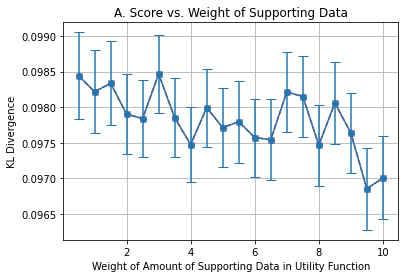

In [7]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x[1:], y2[1:], marker='x', linestyle='--', color='red')
plt.errorbar(x[1:], y2[1:], yerr=y_err_output[1:], fmt='-o', capsize=5)

plt.xlabel('Weight of Amount of Supporting Data in Utility Function')
plt.ylabel('KL Divergence')
plt.title('A. Score vs. Weight of Supporting Data')

# degree = 2
# coefficients = np.polyfit(x, y2, degree)
# poly_curve = np.polyval(coefficients, x)
# plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')


# plt.legend()

plt.grid(True)
plt.savefig('graphics/publishing_search_30_bins_supporting_data.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Graphic to show relationship between surprise level and given metrics

In [8]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [9]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

In [10]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][1])

y_err = []

for key, values in grouped_data.items():
    y_err.append((key, stats.sem(values)))

y_err.sort(key=lambda x: x[0])

y_err_output = []
for key in y_err:
    y_err_output.append(key[1]) 

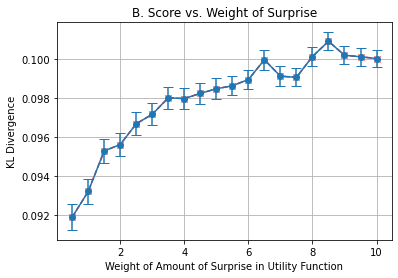

In [11]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x[1:], y2[1:], marker='x', linestyle='--', color='red')
plt.errorbar(x[1:], y2[1:], yerr=y_err_output[1:], fmt='-o', capsize=5)

plt.xlabel('Weight of Amount of Surprise in Utility Function')
plt.ylabel('KL Divergence')
plt.title('B. Score vs. Weight of Surprise')

# plt.legend()
# degree = 2
# coefficients = np.polyfit(x, y2, degree)
# poly_curve = np.polyval(coefficients, x)
# plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')

plt.grid(True)
plt.savefig('graphics/publishing_search_30_bins_surprise.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Graphic to show relationship between publication bias and given metrics

In [12]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [13]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

In [14]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][1])

y_err = []

for key, values in grouped_data.items():
    y_err.append((key, stats.sem(values)))

y_err.sort(key=lambda x: x[0])

y_err_output = []
for key in y_err:
    y_err_output.append(key[1]) 

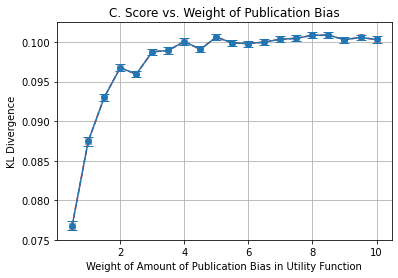

In [15]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x[1:], y2[1:], label='Entropy Score', marker='x', linestyle='--', color='red')
plt.errorbar(x[1:], y2[1:], yerr=y_err_output[1:], fmt='-o', capsize=5)

plt.xlabel('Weight of Amount of Publication Bias in Utility Function')
plt.ylabel('KL Divergence')
plt.title('C. Score vs. Weight of Publication Bias')

# degree = 2
# coefficients = np.polyfit(x, y2, degree)
# poly_curve = np.polyval(coefficients, x)
# plt.plot(x, poly_curve, color='blue', label=f'Best-fit Curve (Degree {degree})')

plt.grid(True)
plt.savefig('graphics/publishing_search_30_bins_publication_bias.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Score across generations and bin probabilities

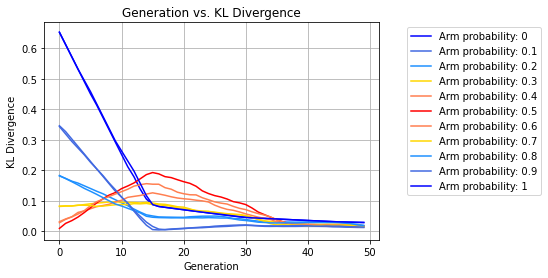

In [6]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/final_map.p", 'rb')
final_map = pickle.load(file)
x = []

for gen_no in final_map[0]:
    x.append(gen_no)
    
red_to_corange_gradient = [
    '#FF0000',    # Red
    '#FF7F50',    # Coral
    '#FFD700',    # Gold
]

shades_of_blue = [
    '#0000FF',  # Blue
    '#4169E1',  # Royal Blue
    '#1E90FF',  # Dodger Blue
    '#6495ED'   # Cornflower Blue
]


count = 0
for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    if abs(count - 5) < 3:
        color = red_to_corange_gradient[abs(count - 5)]
    else:
        color = shades_of_blue[5 - abs(count - 5)]

#     plt.plot(x, y, label=f"Bin probability: {key}", color=rainbow_colors[abs(count - 5)])
    plt.plot(x, y, label=f"Arm probability: {key}", color=color)
    count += 1

plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('Generation vs. KL Divergence')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/KL_generations_bin_probs_new.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Comparing Settings for KL Divergence over Time

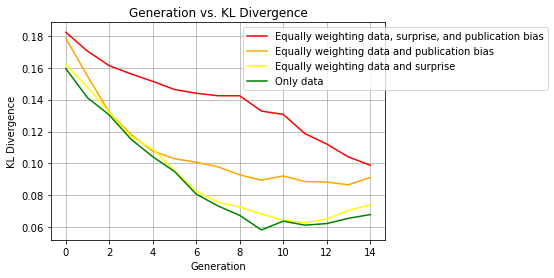

In [16]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/all_three_4.p", 'rb')
final_map = pickle.load(file)

x = []
for gen_no in final_map[0.8]:
    x.append(gen_no)

for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    plt.plot(x, y, label=f"Equally weighting data, surprise, and publication bias", color="red")

file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/data_and_pub_4.p", 'rb')
final_map = pickle.load(file)
for key in final_map:
    y = []
for gen_no in final_map[key]:
    y.append(final_map[key][gen_no])

plt.plot(x, y, label=f"Equally weighting data and publication bias", color="orange")

file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/equal_weight_4.p", 'rb')
final_map = pickle.load(file)
for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
    
    plt.plot(x, y, label=f"Equally weighting data and surprise", color="yellow")

file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/only_data_4.p", 'rb')
final_map = pickle.load(file)

for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    plt.plot(x, y, label=f"Only data", color="green")

plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('Generation vs. KL Divergence')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/KL_generations_settings_comp.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Which parameters give us the publication crisis?

In [31]:
# aim is to graph scalar for surprise against false publication rate (also graph y = 0.3)
# plot a line corresponding to different scalar values for the amount of data...
# ... this will tell you how well an increase in data is able to curtail false publication values
surprise_values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/fpr.p", 'rb')
fpr = pickle.load(file)

In [32]:
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF', '#FF00FF', '#FF1493', '#FF4500', '#FFD700']

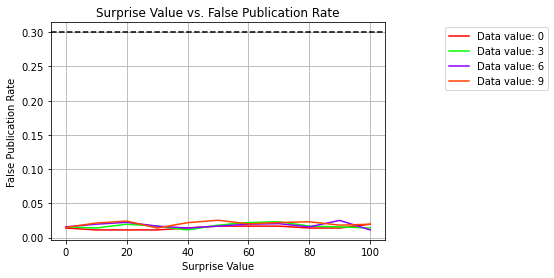

In [157]:
x = surprise_values
y = {}
for i in data_values:
    y[i] = np.zeros(len(surprise_values))


for key in fpr:
    surprise_val = key[0]
    data_val = key[1]
    
    surprise_idx = 0
    for i in range(0, len(surprise_values)):
        if surprise_val == surprise_values[i]:
            surprise_idx = i
    
    y[data_val][surprise_idx] = fpr[key]

for data_val in y:
    if data_val / 3 == round(data_val / 3):
        plt.plot(x, y[data_val], label=f"Data value: {data_val}", color=rainbow_colors[data_val])

plt.axhline(y=0.3, color='black', linestyle='--')
    
plt.xlabel('Surprise Value')
plt.ylabel('False Publication Rate')
plt.title('Surprise Value vs. False Publication Rate')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)

plt.savefig('graphics/surprise_vs_false_publication_rate.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Trusting the scientific consensus (or not)

In [33]:
rainbow_colors = [
    "#FF0000",  # Red
    "#FF4500",  # Orange Red
    "#FFA500",  # Orange
    "#FFD700",  # Gold
    "#FFFF00",  # Yellow
    "#7FFF00",  # Chartreuse
    "#00FF00",  # Lime
    "#00FF7F",  # Spring Green
    "#00FFFF",  # Cyan
    "#007FFF",  # Azure
    "#1E90FF",  # Dodger Blue
    "#0000FF",  # Blue
    "#4B0082",  # Indigo
    "#8A2BE2",  # Violet
    "#800080",  # Purple
    "#FF00FF",  # Magenta
    "#FFC0CB",  # Pink
    "#FFB6C1",  # Light Pink
    "#FF7F50",  # Coral
    "#F08080",  # Light Coral
    "#DC143C"   # Crimson
]

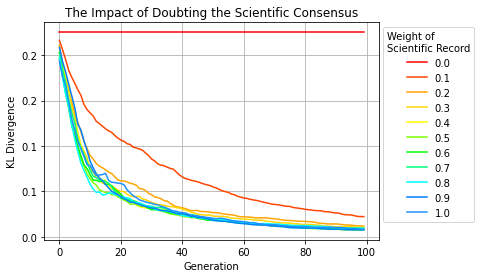

In [40]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/scale_to_kl_gens_doubt_new_KL.p", 'rb')
final_map = pickle.load(file)

x = []
for gen_no in final_map[0.8]:
    x.append(gen_no)

i = 0
for key in final_map:
    if key > 1:
        continue
    
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    plt.plot(x, y, label=f"{key:.1f}", color=rainbow_colors[i])
    i += 1

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('The Impact of Doubting the Scientific Consensus')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), title="Weight of \nScientific Record")

plt.grid(True)

plt.savefig('graphics/trust_figure_doubt_new_KL.pdf', format='pdf', bbox_inches='tight')
plt.show()

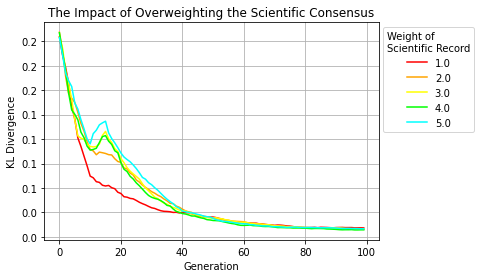

In [39]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/scale_to_kl_gens_overweighting_2.p", 'rb')
final_map = pickle.load(file)

x = []
for gen_no in final_map[1]:
    x.append(gen_no)

i = 0
for key in final_map:
    if key not in [1, 2, 3, 4, 5]:
        continue
    
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])
        
    plt.plot(x, y, label=f"{key:.1f}", color=rainbow_colors[i])
    i += 2

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('The Impact of Overweighting the Scientific Consensus')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), title="Weight of \nScientific Record")

plt.grid(True)

plt.savefig('graphics/trust_figure_overweighting_new_KL.pdf', format='pdf', bbox_inches='tight')
plt.show()

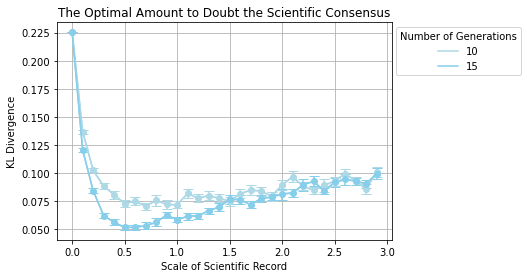

In [44]:
# look for the minimum across all generations. this is the most interesting finding.
shades_of_blue = ["#ADD8E6", "#87CEEB", "#6495ED", "#4682B4", "#4169E1"]

    
# plot for 10 generations
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/record_scale_against_kl_10_gens_new_KL.p", 'rb')
final_map = pickle.load(file)

x = []
for scale in final_map:
    x.append(scale)

y = []
y_err = []
for key in final_map:
    y.append(final_map[key][0])
    y_err.append(final_map[key][1])
        
plt.plot(x, y, label = "10", color=shades_of_blue[0])
plt.errorbar(x, y, yerr=y_err, fmt='-o', capsize=5, color=shades_of_blue[0])

# plot for 15 generations
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/record_scale_against_kl_15_gens_new_KL.p", 'rb')
final_map = pickle.load(file)

y = []
y_err = []
for key in final_map:
    y.append(final_map[key][0])
    y_err.append(final_map[key][1])
        
plt.plot(x, y, label = "15", color=shades_of_blue[1])
plt.errorbar(x, y, yerr=y_err, fmt='-o', capsize=5, color=shades_of_blue[1])

# # plot for 20 generations
# file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/record_scale_against_kl_20_gens_new_KL.p", 'rb')
# final_map = pickle.load(file)

# y = []
# y_err = []
# for key in final_map:
#     y.append(final_map[key][0])
#     y_err.append(final_map[key][1])
        
# plt.plot(x, y, label = "20", color=shades_of_blue[2])
# plt.errorbar(x, y, yerr=y_err, fmt='-o', capsize=5, color=shades_of_blue[2])

# # plot for 30 generations
# file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/record_scale_against_kl_30_gens_new_KL.p", 'rb')
# final_map = pickle.load(file)

# y = []
# y_err = []
# for key in final_map:
#     y.append(final_map[key][0])
#     y_err.append(final_map[key][1])
        
# plt.plot(x, y, label = "30", color=shades_of_blue[3])
# plt.errorbar(x, y, yerr=y_err, fmt='-o', capsize=5, color=shades_of_blue[3])

# # plot for 50 generations
# file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/record_scale_against_kl_50_gens_new_KL.p", 'rb')
# final_map = pickle.load(file)

# y = []
# y_err = []
# for key in final_map:
#     y.append(final_map[key][0])
#     y_err.append(final_map[key][1])
        
# plt.plot(x, y, label = "30", color=shades_of_blue[4])
# plt.errorbar(x, y, yerr=y_err, fmt='-o', capsize=5, color=shades_of_blue[4])

plt.xlabel('Scale of Scientific Record')
plt.ylabel('KL Divergence')
plt.title('The Optimal Amount to Doubt the Scientific Consensus')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0), title="Number of Generations")

plt.grid(True)

plt.savefig('graphics/trust_figure_optimal_amt.pdf', format='pdf', bbox_inches='tight')
plt.show()